In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

In [2]:
import xlrd
import csv

# Replace 'your_file.xls' with the actual path to your XLS file
input_file = 'S&P Global High Yield Sukuk Index.xls'

# Replace 'output.csv' with your desired output CSV filename
output_file = 'S&P Global High Yield Sukuk Index.csv'

# Open the XLS file using xlrd
workbook = xlrd.open_workbook(input_file)

# Get the first sheet (you can adjust the index to access a different sheet)
sheet = workbook.sheet_by_index(0)

# Open the output CSV file in write mode
with open(output_file, 'w', newline='') as csvfile:
  # Create a CSV writer object
  writer = csv.writer(csvfile)

  # Write the header row (optional, adjust column names if needed)
  writer.writerow([sheet.cell_value(0, col) for col in range(sheet.ncols)])

  # Write data rows
  for row in range(1, sheet.nrows):
    data = [sheet.cell_value(row, col) for col in range(sheet.ncols)]
    writer.writerow(data)

print(f'XLS file converted to CSV: {output_file}')

XLS file converted to CSV: S&P Global High Yield Sukuk Index.csv


In [7]:
# Load data
data = pd.read_csv("S&P Global High Yield Sukuk Index.csv")
print(data)
# Extract features (date) and target (price)
X = data["Effective date"]
y = data["S&P Global High Yield Sukuk Index"]

      Effective date  S&P Global High Yield Sukuk Index
0            41698.0                             102.12
1            41701.0                             102.41
2            41702.0                             102.12
3            41703.0                             102.17
4            41704.0                             102.08
...              ...                                ...
2592         45349.0                             171.60
2593         45350.0                             171.65
2594         45351.0                             171.89
2595         45352.0                             172.00
2596         45355.0                             171.91

[2597 rows x 2 columns]


In [12]:
# Load data
data = pd.read_csv("S&P Global High Yield Sukuk Index.csv")

# Extract features (date) and target (price)
X = data["Effective date"]
y = data["S&P Global High Yield Sukuk Index"]

# Preprocess date data (consider converting to numerical format)
# This example uses string representation for simplicity
#X = pd.to_datetime(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [52]:
model = Sequential()
model.add(Dense(16, activation="relu", input_dim=1))
model.add(Dense(8, activation="linear"))
model.add(Dense(4, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer= Adam(learning_rate=lr_schedule))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1000, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict(X_test)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

Epoch 1/100
3/3 - 1s - loss: 62165368.0000 - val_loss: 43252664.0000 - 968ms/epoch - 323ms/step
Epoch 2/100
3/3 - 0s - loss: 39720220.0000 - val_loss: 25150468.0000 - 39ms/epoch - 13ms/step
Epoch 3/100
3/3 - 0s - loss: 22546080.0000 - val_loss: 12316003.0000 - 35ms/epoch - 12ms/step
Epoch 4/100
3/3 - 0s - loss: 10623209.0000 - val_loss: 4427355.5000 - 38ms/epoch - 13ms/step
Epoch 5/100
3/3 - 0s - loss: 3543837.7500 - val_loss: 732471.3125 - 30ms/epoch - 10ms/step
Epoch 6/100
3/3 - 0s - loss: 469568.2500 - val_loss: 30326.6660 - 31ms/epoch - 10ms/step
Epoch 7/100
3/3 - 0s - loss: 133779.7031 - val_loss: 861060.8125 - 34ms/epoch - 11ms/step
Epoch 8/100
3/3 - 0s - loss: 1069463.2500 - val_loss: 1897557.3750 - 43ms/epoch - 14ms/step
Epoch 9/100
3/3 - 0s - loss: 2026952.3750 - val_loss: 2349437.0000 - 48ms/epoch - 16ms/step
Epoch 10/100
3/3 - 0s - loss: 2339060.0000 - val_loss: 2080834.5000 - 31ms/epoch - 10ms/step
Epoch 11/100
3/3 - 0s - loss: 1968074.2500 - val_loss: 1387878.1250 - 32ms/e

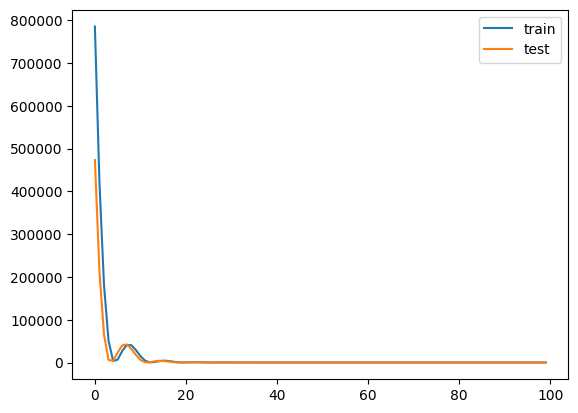

In [49]:

# Plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

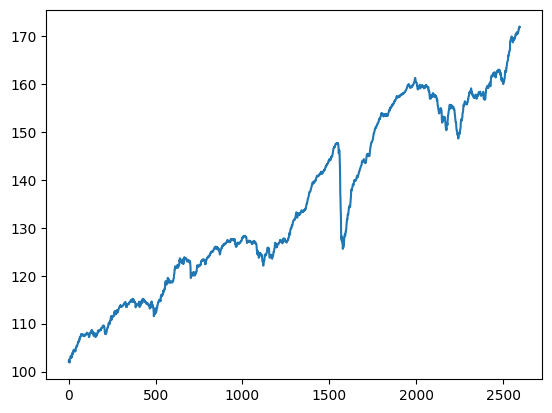

In [16]:
pyplot.plot(data['S&P Global High Yield Sukuk Index'], label='Effective date')
pyplot.show()

Training Set R-Square= 0.3127020948802103


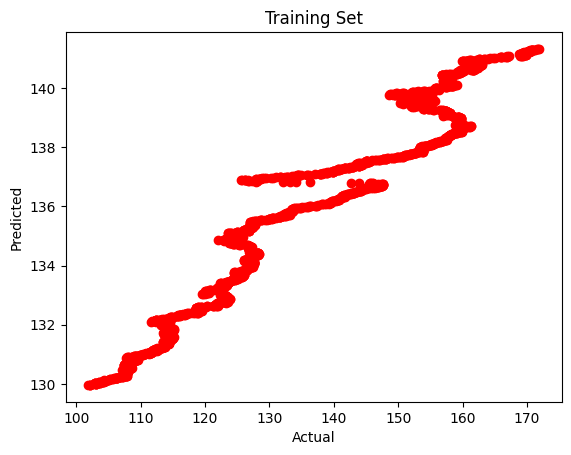

In [53]:

# Plot actual vs prediction for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(y_train,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for training set
TestR2Value = r2_score(y_train,TestResults)
print("Training Set R-Square=", TestR2Value)